In [7]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INF = math.inf

In [52]:
def run_epidemic_mm1(N, arrival_rate, service_rate):
  # Fixar a semente do gerador de números aleatórios
  random.seed(10)

  l = 0 # Número pessoas no sistema
  n_arrivals = 0 # Número de infeccoes
  n_departures = 0 # Número de recuperacoes

  clock = 0 # Relógio de simulação
  clock_next_arr = 0 # Instante do próximo evento de chegada
  clock_next_dep = INF # Instante do próximo evento de partida

  clock_between_arr = 0 # Tempo entre chegadas
  clock_between_dep = INF # Tempo entre partidas

  sum_between_arr = 0 # Soma dos tempos entre chegadas
  sum_between_dep = 0 # Soma dos tempos entre partidas

  generation_sizes = [0] * (N+1) # Tamanhos das gerações
  actual_generation = 0 # Geração atual
  actual_generation_size = 1 # Tamanho da geração atual

  it = 0 # Iteração atual

  # Loop principal da simulação
  while True and it < N:
    it += 1
    if clock_next_arr < clock_next_dep: # Infeccao
      clock = clock_next_arr
      l += 1
      n_arrivals += 1
      generation_sizes[actual_generation + 1] += 1

      clock_between_arr = random.expovariate(arrival_rate)
      clock_next_arr = clock + clock_between_arr
      sum_between_arr += clock_between_arr

      if l == 1:
        clock_between_dep = random.expovariate(service_rate)
        clock_next_dep = clock + clock_between_dep

    else: # Recuperacao
      clock = clock_next_dep
      l -= 1
      n_departures += 1
      actual_generation_size -= 1

      if l > 0:
        clock_between_dep = random.expovariate(service_rate)
        clock_next_dep = clock + clock_between_dep

      else:
        break

      if actual_generation_size == 0:
        actual_generation += 1
        actual_generation_size = generation_sizes[actual_generation]

  return {
    'n_arrivals': n_arrivals,
    'n_departures': n_departures,
    'sum_between_arr': sum_between_arr,
    'sum_between_dep': sum_between_dep,
    'generation_sizes': generation_sizes,
    'number_of_generations': actual_generation,
    'clock': clock,
  }

Número de infeccoes: 9275
Número de recuperacoes: 725
Tempo médio entre infeccoes: 0.4030071824177371
Tempo médio entre recuperacoes: 0.0
Tempo médio de permanência: 5.1556688751422675
Tamanho médio das gerações: 0.9274072592740726
Número de gerações: 3


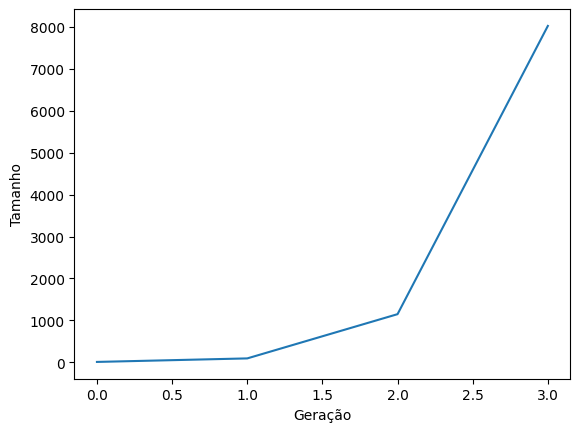

In [56]:
N = 10000  # Número total iterações
arrival_rate = 2.45  # Taxa média de chegada
service_rate = 0.19  # Taxa média de serviço
result = run_epidemic_mm1(N, arrival_rate, service_rate)

print('Número de infeccoes:', result['n_arrivals'])
print('Número de recuperacoes:', result['n_departures'])
print('Tempo médio entre infeccoes:', result['sum_between_arr'] / result['n_arrivals'])
print('Tempo médio entre recuperacoes:', result['sum_between_dep'] / result['n_departures'])
print('Tempo médio de permanência:', result['clock'] / result['n_departures'])
print('Tamanho médio das gerações:', np.mean(result['generation_sizes']))
print('Número de gerações:', result['number_of_generations'])

# Plota grafico de evolucao do tamanho das geracoes
# removendo as geracoes vazias
generation_sizes = [size for size in result['generation_sizes'] if size > 0]
plt.plot(generation_sizes)
plt.xlabel('Geração')
plt.ylabel('Tamanho')
plt.show()